# Porta XOR usando perceptron

A porta XOR não é um problema linear, pois não existe uma única linha que consiga dividir o espaço corretamente. Para tanto é necessário utilizar a combinação de portas para resolvê-lo ou utilizar funções como, por exemplo, sigmoid.

A tabela a seguir demonstra as possíveis saídas obtidas pela porta XOR, tendo X1 e X2 como as entradas da porta.

|X1|X2|Saída|
|:--:|:--:|:--:|
|0|0|0|
|0|1|1|
|1|0|1|
|1|1|0|

Sendo assim o gráfico a seguir mostra visualmente as saídas de acordo com as respectivas entradas, onde o eixo X é a variável X1 e o eixo Y é a variável X2.

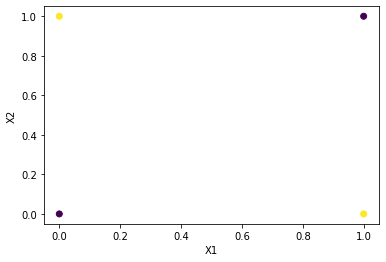

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle

xpoints = np.array([0, 1, 0 ,1])
ypoints = np.array([0, 1, 1, 0])

plt.scatter(xpoints, ypoints, c=[0,0,1,1])
plt.xlabel('X1')
plt.ylabel('X2')

plt.show()

Percebe-se que não é possível dividir o espaço onde as saídas com valor 0 estejam juntas, idem para o valor 1. Sendo assim é necessário construir a porta XOR através do perceptron realizando a combinação das portas AND, OR e NAND.

Portanto, combinamos a porta OR e NAND com a porta AND para gerarmos a porta XOR:

![texto do link](https://i.imgur.com/k97zHcB.jpg)

Por fim temos a seguinte arquitetura da rede neural:

![](https://i.imgur.com/TLC8ksi.jpg)

# Implementação da rede neural

>OBS.: A biblioteca Numpy já foi importada anteriormente para o plot das saídas da porta XOR.

**Definição da entrada**

In [2]:

train_data = np.array(
    [
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1]])

**Definição das saídas esperadas**

Saídas esperadas pelas portas XOR, NAND, OR e AND.


Porta NAND:

In [3]:
target_nand = np.array(
    [
        [1],
        [1],
        [1],
        [0]])

Porta OR:

In [4]:
target_or = np.array(
    [
        [0],
        [1],
        [1],
        [1]])

Porta AND:

In [5]:
target_and = np.array(
    [
        [0],
        [0],
        [0],
        [1]])

**Definição da classe Perceptron**

Na classe Perceptron teremos os seguintes atributos:
 - trains_data -> Dados de entrada
 - target -> Saida esperada
 - lr -> Taxa de aprendizagem
 - input_nodes -> Quantidade de nos na entrada 
 - w -> Pesos
 - b -> Bias
 - node_val -> Valor dos nós que salvará os valores de cada nó em um dado tempo
 - correct_iter -> Vetor que salva a i
 

Além dos atributos a classe Perceptron terá os seguintes métodos:
 - _gradient -> Método responsável por calcular o gradiente
 - update_weights -> Método responsável por atualizar os pesos
 - forward -> Método responsável pela ativação, ou seja, a implementação de `wX+b`
 - classify -> Método que classificará os valores recebidos em classes
 - train -> Método que irá treinar a rede neural

In [6]:

class Perceptron:

    def __init__(self, train_data, target, lr=0.01, input_nodes=2):
        self.train_data = train_data
        self.target = target
        self.lr = lr
        self.input_nodes = input_nodes
        self.w = np.random.uniform(size=self.input_nodes)
        self.b = -1
        self.node_val = np.zeros(self.input_nodes)
        self.correct_iter = [0]

    def _gradient(self, node, exp, output):
        return node * (exp - output)

    def update_weights(self, exp, output):
        for i in range(self.input_nodes):
            self.w[i] += self.lr * self._gradient(self.node_val[i], exp, output)
        self.b += self.lr * self._gradient(1, exp, output)

    def forward(self, datapoint):
        return self.b + np.dot(self.w, datapoint)

    def classify(self, datapoint):
        if self.forward(datapoint) >= 0:
            return 1

        return 0
    def train(self):
        correct_counter = 0
        iterations = 0

        for train, target in cycle(zip(self.train_data, self.target)):
            if correct_counter == len(self.train_data):
                break

            output = self.classify(train)
            self.node_val = train
            iterations += 1

            if output == target:
                correct_counter += 1
            else:

                self.update_weights(target, output)
                correct_counter = 0
        
            self.correct_iter.append(correct_counter)

**Definição da porta XOR**
A porta XOR será a combinação, através da porta AND, das portas OR e NAND.

In [28]:

def XOR(x1, x2):

    x = [x1, x2]
    p_or = Perceptron(train_data, target_or)
    p_nand = Perceptron(train_data, target_nand)
    p_and = Perceptron(train_data, target_and)
    
    p_or.train()
    p_nand.train()
    p_and.train()

    print(f'{x1} XOR {x2}')
    print(f'Pesos da porta OR :: {p_or.w}')
    print(f'Pesos da porta NAND :: {p_nand.w}')
    print(f'Pesos da porta AND ::{p_and.w}')

    return p_and.classify([p_or.classify(x),
                          p_nand.classify(x)])

**Utilizando a porta XOR**

In [30]:
print('Resultados: ')
print('==========================')
print(f'Resultado = {XOR(0,0)}')
print('==========================')
print(f'Resultado = {XOR(0,1)}')
print('==========================')
print(f'Resultado = {XOR(1,0)}')
print('==========================')
print(f'Resultado = {XOR(1,1)}')

Resultados: 
0 XOR 0
Pesos da porta OR :: [0.81823861 0.73582679]
Pesos da porta NAND :: [-0.02394189 -0.01206415]
Pesos da porta AND ::[0.70971822 0.60821509]
Resultado = 0
0 XOR 1
Pesos da porta OR :: [0.56129337 0.74467338]
Pesos da porta NAND :: [-0.0213385  -0.01075915]
Pesos da porta AND ::[0.60338116 0.79333964]
Resultado = 1
1 XOR 0
Pesos da porta OR :: [0.7024473  0.51808808]
Pesos da porta NAND :: [-0.01684924 -0.00714845]
Pesos da porta AND ::[0.74545999 0.3150126 ]
Resultado = 1
1 XOR 1
Pesos da porta OR :: [0.63381195 0.80759339]
Pesos da porta NAND :: [-0.02217134 -0.01062865]
Pesos da porta AND ::[0.25424649 0.83681075]
Resultado = 0
